In [174]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


cityData = pd.read_csv(city_data_to_load)
cityData.head()

rideData = pd.read_csv(ride_data_to_load)
rideData.head()



# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview
combinedData = pd.merge(cityData, rideData, on="city")
combinedData["total fare"] = combinedData["fare"]
combinedData.head()


,city,driver_count,type,date,fare,ride_id,total fare
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794,13.93
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494,14.00
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416,17.92
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413,10.26
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850,23.00


In [108]:
alteredDict = {'fare':np.mean,
          'ride_id':np.size,
         'driver_count':np.unique,
         'total fare': np.sum}

newColumns={'fare': 'Average Fare',
        'ride_id': 'Total Rides',
        'driver_count': 'Driver Count',
        'total fare': 'Total Fare'}

newCombinedData = combinedData.groupby(['type', 'city'], as_index=False).agg(alteredDict).rename(columns = newColumns)
newCombinedData

ruralDF = newCombinedData[newCombinedData['type']=="Rural"]
suburbanDF = newCombinedData[newCombinedData['type']=="Suburban"]
urbanDF = newCombinedData[newCombinedData['type']=="Urban"]





## Bubble Plot of Ride Sharing Data

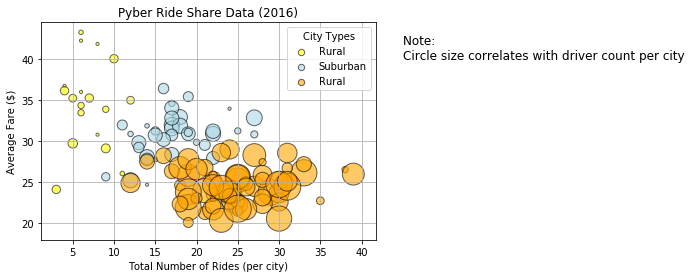

In [235]:
# Obtain the x and y coordinates for each of the three city types
ruralX = ruralDF['Total Rides']
ruralY = ruralDF['Average Fare']
dotSizeRural = ruralDF['Driver Count'] * 10

suburbanX = suburbanDF['Total Rides']
suburbanY = suburbanDF['Average Fare']
dotSizeSuburban = suburbanDF['Driver Count'] * 10

urbanX = urbanDF['Total Rides']
urbanY = urbanDF['Average Fare']
dotSizeUrban = urbanDF['Driver Count'] * 10
# Build the scatter plots for each city types

ruralPlot = plt.scatter(ruralX, ruralY, color="yellow", label="Rural", alpha=".6", edgecolors= "black", s=dotSizeRural)
suburbanPlot = plt.scatter(suburbanX, suburbanY, color="lightblue", label="Suburban", alpha=".6", edgecolors= "black", s=dotSizeSuburban)
urbanPlot = plt.scatter(urbanX, urbanY, color="orange", label="Rural", alpha=".6", edgecolors= "black", s=dotSizeUrban)


plt.xlabel('Total Number of Rides (per city)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Share Data (2016)')
legend = plt.legend(title="City Types", loc='upper right')
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]
theNote = "Note: \nCircle size correlates with driver count per city"
plt.text(45, 40, theNote, fontsize=12)
plt.grid(True)
plt.savefig("pyberRidesDots.png")
plt.show()

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size



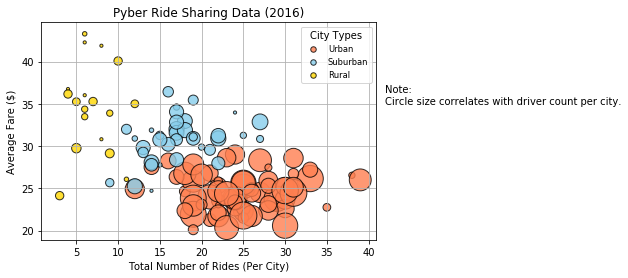

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

(-1.1188526481121324,
 1.2182050353693157,
 -1.1004111332074498,
 1.1179160343406613)

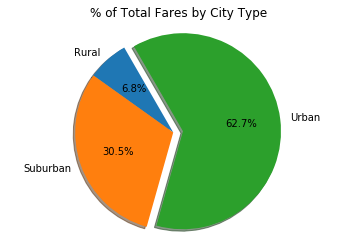

In [233]:
# Calculate Type Percents
ruralDF
suburbanDF
urbanDF

ruralFares = ruralDF["Total Fare"].sum()
suburbanFares = suburbanDF["Total Fare"].sum()
urbanFares = urbanDF["Total Fare"].sum()

totalFares = ruralFares + suburbanFares + urbanFares

ruralFaresPercent = (ruralFares / totalFares * 100).round(1)
suburbanFaresPercent = (suburbanFares / totalFares * 100).round(1)
urbanFaresPercent = (urbanFares / totalFares * 100).round(1)

# Build Pie Chart
plt.title('% of Total Fares by City Type')
pieLabels = 'Rural', 'Suburban', 'Urban'
pieSizes = [ruralFaresPercent, suburbanFaresPercent, urbanFaresPercent]
explode = (0, 0, 0.1)

plt.pie(pieSizes, explode=explode, labels=pieLabels, autopct='%1.1f%%', shadow=True, startangle=120)
plt.axis('equal') 

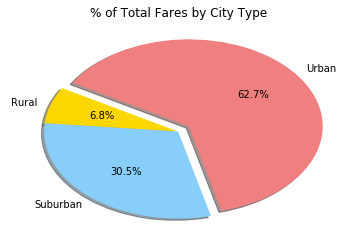

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents
ruralDF
suburbanDF
urbanDF

# Build Pie Chart

# Save Figure


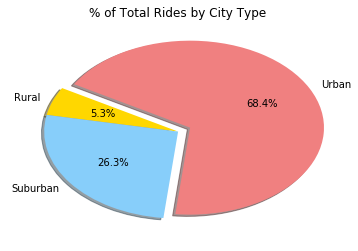

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure


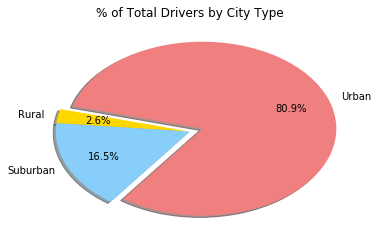

In [6]:
# Show Figure
plt.show()